# How close are previous algorithms to the smallest possible sample size and how much closer can we get with SampLNS

We don't know the actual smallest possible sample sizes, but we have a lower bound that we can use.


Let us first load the data from the experiment with solved each of the 44 small to medium instance 5 times with each of the previous algorithms. Then these samples were optimized for 900s by SampLNS.

In [85]:
import pandas as pd
from _conf import PREPROCESSED_DATA

In [86]:
samplns_data = pd.read_json(PREPROCESSED_DATA)
from _conf import EXTENDED_BASELINE_DATA

baseline_data = pd.read_json(EXTENDED_BASELINE_DATA)
baseline_data

,instance_name,num_vars,num_clauses,baseline_alg,baseline_alg_conf,runtime,sample_size,path_to_baseline_sample,archive_path
0,PPU,52.0,109.0,FIDE-ICPL,t2,1706,15.0,2024-02-23_21-52-24/1_1_0_1_sample.csv,./EXTERNAL_INPUT/baseline.zip
1,PPU,52.0,109.0,FIDE-Chvatal,t2,1455,15.0,2024-02-23_21-52-24/1_1_1_1_sample.csv,./EXTERNAL_INPUT/baseline.zip
2,PPU,52.0,109.0,Incling,t2,171,17.0,2024-02-23_21-52-24/1_1_2_1_sample.csv,./EXTERNAL_INPUT/baseline.zip
3,PPU,52.0,109.0,FIDE-YASA,t2_m1_null,266,13.0,2024-02-23_21-52-24/1_1_3_1_sample.csv,./EXTERNAL_INPUT/baseline.zip
4,PPU,52.0,109.0,FIDE-YASA,t2_m3_null,290,12.0,2024-02-23_21-52-24/1_1_4_1_sample.csv,./EXTERNAL_INPUT/baseline.zip
...,...,...,...,...,...,...,...,...,...
2825,am31_sim,1178.0,2747.0,FIDE-YASA(15min),,900000,69.0,/home/krupke/Repositories/SampLNS/evaluation/0...,None
2826,am31_sim,1178.0,2747.0,FIDE-YASA(15min),,900000,72.0,/home/krupke/Repositories/SampLNS/evaluation/0...,None
2827,am31_sim,1178.0,2747.0,FIDE-YASA(15min),,900000,70.0,/home/krupke/Repositories/SampLNS/evaluation/0...,None
2828,am31_sim,1178.0,2747.0,FIDE-YASA(15min),,900000,72.0,/home/krupke/Repositories/SampLNS/evaluation/0...,None


In [87]:
best_lower_bound = (
    samplns_data.groupby(["instance_name"])["lower_bound"]
    .max()
    .reset_index()
    .rename(columns={"lower_bound": "best_lower_bound"})
)

In [88]:
best_upper_bound = (
    samplns_data.groupby(["instance_name"])["upper_bound"]
    .max()
    .reset_index()
    .rename(columns={"upper_bound": "best_upper_bound"})
)

In [89]:
best_bounds = pd.merge(best_lower_bound, best_upper_bound, on="instance_name")
from _conf import EXPORT_BEST_BOUNDS

best_bounds.to_csv(EXPORT_BEST_BOUNDS)
best_bounds

,instance_name,best_lower_bound,best_upper_bound
0,APL,7,7
1,APL-Model,8,8
2,BankingSoftware,28,29
3,BattleofTanks,256,353
4,ChatClient,7,7
5,DMIE,16,17
6,E-Shop,8,13
7,EMBToolkit,1741,1892
8,FameDB,8,8
9,FeatureIDE,7,8


In [90]:
best_lower_bound["internal_best"] = best_lower_bound["best_lower_bound"]
from _conf import EXTERNAL_BOUNDS

external_best_lb = (
    pd.concat([pd.read_csv(p) for p in EXTERNAL_BOUNDS])
    .groupby(["instance_name"])["best_lower_bound"]
    .max()
    .reset_index()
)
best_lower_bound = (
    pd.concat([best_lower_bound, external_best_lb])
    .groupby(["instance_name"])[["best_lower_bound", "internal_best"]]
    .max()
    .reset_index()
)
best_lower_bound

,instance_name,best_lower_bound,internal_best
0,APL,7,7.0
1,APL-Model,8,8.0
2,BankingSoftware,29,28.0
3,BattleofTanks,256,256.0
4,ChatClient,7,7.0
5,DMIE,16,16.0
6,E-Shop,9,8.0
7,EMBToolkit,1872,1741.0
8,FameDB,8,8.0
9,FeatureIDE,7,7.0


In [91]:
best_upper_bound = (
    samplns_data.groupby(["instance_name"])["upper_bound"]
    .min()
    .reset_index()
    .rename(columns={"upper_bound": "best_upper_bound"})
)
best_upper_bound["internal_best_upper_bound"] = best_upper_bound["best_upper_bound"]
from _conf import EXTERNAL_BOUNDS

external_best_ub = (
    pd.concat([pd.read_csv(p) for p in EXTERNAL_BOUNDS])
    .groupby(["instance_name"])["best_upper_bound"]
    .min()
    .reset_index()
)
best_upper_bound = (
    pd.concat([best_upper_bound, external_best_ub])
    .groupby(["instance_name"])[["best_upper_bound", "internal_best_upper_bound"]]
    .min()
    .reset_index()
)
best_upper_bound

,instance_name,best_upper_bound,internal_best_upper_bound
0,APL,7,7.0
1,APL-Model,8,8.0
2,BankingSoftware,29,29.0
3,BattleofTanks,307,338.0
4,ChatClient,7,7.0
5,DMIE,16,16.0
6,E-Shop,12,12.0
7,EMBToolkit,1872,1886.0
8,FameDB,8,8.0
9,FeatureIDE,8,8.0


In [92]:
samplns_data

,num_vars,num_clauses,baseline_alg,baseline_alg_conf,runtime_baseline,baseline_sample_size,path_to_baseline_sample,archive_path,parameters,instance_name,lower_bound,upper_bound,iteration_info,time_used_by_yasa,timelimit_for_samplns,samplns_used,runtime_samplns,time_limit
0,854,1164,FIDE-YASA,t2_m1_null,2639,30,2023-03-01_13-51-03/36_1_3_2_sample.csv,./EXTERNAL_INPUT/900_seconds_5_it.zip,"{'func': 'run_samplns', 'args': {'instance_nam...",busybox-1_18_0,12,18,"[{'nbrhd_tuples': 141, 'nbrhd_confs': 1, 'iter...",2.639,897.361,True,916.832970,900
1,28,40,FIDE-YASA,t2_m1_null,312,15,2023-03-01_13-51-03/12_1_3_4_sample.csv,./EXTERNAL_INPUT/900_seconds_5_it.zip,"{'func': 'run_samplns', 'args': {'instance_nam...",APL-Model,8,8,"[{'nbrhd_tuples': 204, 'nbrhd_confs': 11, 'ite...",0.312,899.688,True,145.871509,900
2,334,92,FIDE-YASA,t2_m1_null,741,19,2023-03-01_13-51-03/29_1_3_4_sample.csv,./EXTERNAL_INPUT/900_seconds_5_it.zip,"{'func': 'run_samplns', 'args': {'instance_nam...",toybox_2020-12-06_00-02-46,7,14,"[{'nbrhd_tuples': 171, 'nbrhd_confs': 1, 'iter...",0.741,899.259,True,902.233030,900
3,326,499,FIDE-YASA,t2_m1_null,736,22,2023-03-01_13-51-03/28_1_3_1_sample.csv,./EXTERNAL_INPUT/900_seconds_5_it.zip,"{'func': 'run_samplns', 'args': {'instance_nam...",E-Shop,8,12,"[{'nbrhd_tuples': 48, 'nbrhd_confs': 2, 'itera...",0.736,899.264,True,924.385270,900
4,326,499,FIDE-YASA,t2_m1_null,737,22,2023-03-01_13-51-03/28_1_3_3_sample.csv,./EXTERNAL_INPUT/900_seconds_5_it.zip,"{'func': 'run_samplns', 'args': {'instance_nam...",E-Shop,8,12,"[{'nbrhd_tuples': 131, 'nbrhd_confs': 4, 'iter...",0.737,899.263,True,928.903876,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,23,35,FIDE-YASA,t2_m1_null,300,11,2023-03-01_13-51-03/9_1_3_5_sample.csv,./EXTERNAL_INPUT/900_seconds_5_it.zip,"{'func': 'run_samplns', 'args': {'instance_nam...",APL,7,7,"[{'nbrhd_tuples': 207, 'nbrhd_confs': 10, 'ite...",0.300,899.700,True,8.232830,900
226,1397,15692,FIDE-YASA,t2_m1_null,14082,91,2023-03-01_13-51-03/46_1_3_1_sample.csv,./EXTERNAL_INPUT/900_seconds_5_it.zip,"{'func': 'run_samplns', 'args': {'instance_nam...",FreeBSD-8_0_0,25,63,"[{'nbrhd_tuples': 240, 'nbrhd_confs': 6, 'iter...",14.082,885.918,True,911.483217,900
227,1245,3723,FIDE-YASA,t2_m1_null,4817,77,2023-03-01_13-51-03/42_1_3_4_sample.csv,./EXTERNAL_INPUT/900_seconds_5_it.zip,"{'func': 'run_samplns', 'args': {'instance_nam...",eCos-3-0_i386pc,26,53,"[{'nbrhd_tuples': 211, 'nbrhd_confs': 3, 'iter...",4.817,895.183,True,897.367976,900
228,557,4992,FIDE-YASA,t2_m1_null,2124,400,2023-03-01_13-51-03/33_1_3_1_sample.csv,./EXTERNAL_INPUT/900_seconds_5_it.zip,"{'func': 'run_samplns', 'args': {'instance_nam...",fs_2017-05-22,396,396,"[{'nbrhd_tuples': 0, 'nbrhd_confs': 0, 'iterat...",2.124,897.876,True,420.326800,900


In [93]:
samplns_data = samplns_data[["instance_name", "lower_bound", "upper_bound"]]
samplns_data = samplns_data.merge(best_lower_bound, on="instance_name")
samplns_data = samplns_data.merge(best_upper_bound, on="instance_name")
# How many percent is the solution above the best lower bound?
samplns_data["gap"] = 100 * (
    samplns_data["upper_bound"] / samplns_data["best_lower_bound"] - 1
)
samplns_data["diff_to_best"] = 100 * (
    samplns_data["upper_bound"] / samplns_data["best_upper_bound"] - 1
)
samplns_data["algorithm_name"] = "SampLNS"
samplns_data.groupby("instance_name")[["lower_bound", "upper_bound", "gap"]].mean()

,lower_bound,upper_bound,gap
instance_name,,,
APL,7.0,7.0,0.000000
APL-Model,8.0,8.0,0.000000
BankingSoftware,28.0,29.0,0.000000
BattleofTanks,256.0,343.8,34.296875
ChatClient,7.0,7.0,0.000000
DMIE,16.0,16.2,1.250000
E-Shop,8.0,12.2,35.555556
EMBToolkit,1592.6,1889.0,0.908120
FameDB,8.0,8.0,0.000000


In [94]:
samplns_data.groupby("instance_name")[["gap"]].mean().reset_index()[["gap"]].mean()

gap    15.423549
dtype: float64

In [95]:
baseline_data = baseline_data[
    ["instance_name", "sample_size", "baseline_alg", "baseline_alg_conf"]
]
baseline_data = baseline_data.merge(best_lower_bound, on="instance_name")
baseline_data = baseline_data.merge(best_upper_bound, on="instance_name")

baseline_data["gap"] = 100 * (
    (baseline_data["sample_size"] / baseline_data["best_lower_bound"]) - 1
)
baseline_data["diff_to_best"] = 100 * (
    (baseline_data["sample_size"] / baseline_data["best_upper_bound"]) - 1
)


def baseline_alg_name(row):
    settings = row["baseline_alg_conf"]
    if "_m" in settings:
        m = settings.split("_m")[-1].split("_")[0]
        return f"{row['baseline_alg']}(m={m})"
    return row["baseline_alg"]


baseline_data["algorithm_name"] = baseline_data.apply(baseline_alg_name, axis=1)
# baseline_data.rename(columns={"baseline_alg": "Algorithm"})
baseline_data

,instance_name,sample_size,baseline_alg,baseline_alg_conf,best_lower_bound,internal_best,best_upper_bound,internal_best_upper_bound,gap,diff_to_best,algorithm_name
0,PPU,15.0,FIDE-ICPL,t2,12,12.0,12,12.0,25.000000,25.000000,FIDE-ICPL
1,PPU,15.0,FIDE-Chvatal,t2,12,12.0,12,12.0,25.000000,25.000000,FIDE-Chvatal
2,PPU,17.0,Incling,t2,12,12.0,12,12.0,41.666667,41.666667,Incling
3,PPU,13.0,FIDE-YASA,t2_m1_null,12,12.0,12,12.0,8.333333,8.333333,FIDE-YASA(m=1)
4,PPU,12.0,FIDE-YASA,t2_m3_null,12,12.0,12,12.0,0.000000,0.000000,FIDE-YASA(m=3)
...,...,...,...,...,...,...,...,...,...,...,...
2755,EMBToolkit,1938.0,FIDE-YASA(15min),,1872,1741.0,1872,1886.0,3.525641,3.525641,FIDE-YASA(15min)
2756,EMBToolkit,1932.0,FIDE-YASA(15min),,1872,1741.0,1872,1886.0,3.205128,3.205128,FIDE-YASA(15min)
2757,EMBToolkit,1938.0,FIDE-YASA(15min),,1872,1741.0,1872,1886.0,3.525641,3.525641,FIDE-YASA(15min)
2758,EMBToolkit,1938.0,FIDE-YASA(15min),,1872,1741.0,1872,1886.0,3.525641,3.525641,FIDE-YASA(15min)


In [96]:
gaps = pd.concat(
    [
        samplns_data[["algorithm_name", "instance_name", "gap", "diff_to_best"]],
        baseline_data[["algorithm_name", "instance_name", "gap", "diff_to_best"]],
    ]
)
gaps

,algorithm_name,instance_name,gap,diff_to_best
0,SampLNS,busybox-1_18_0,38.461538,5.882353
1,SampLNS,busybox-1_18_0,38.461538,5.882353
2,SampLNS,busybox-1_18_0,46.153846,11.764706
3,SampLNS,busybox-1_18_0,38.461538,5.882353
4,SampLNS,busybox-1_18_0,38.461538,5.882353
...,...,...,...,...
2755,FIDE-YASA(15min),EMBToolkit,3.525641,3.525641
2756,FIDE-YASA(15min),EMBToolkit,3.205128,3.205128
2757,FIDE-YASA(15min),EMBToolkit,3.525641,3.525641
2758,FIDE-YASA(15min),EMBToolkit,3.525641,3.525641


In [97]:
gaps["algorithm_name"].unique().tolist()

['SampLNS',
 'FIDE-ICPL',
 'FIDE-Chvatal',
 'Incling',
 'FIDE-YASA(m=1)',
 'FIDE-YASA(m=3)',
 'FIDE-YASA(m=5)',
 'FIDE-YASA(m=10)',
 'ACTS-IPOG-FT',
 'ACTS-IPOG-CSP',
 'ACTS-IPOF-FT',
 'ACTS-IPOF-CSP',
 'FIDE-YASA(15min)']

In [98]:
algorithm_selection = [
    "SampLNS",
    "FIDE-ICPL",
    "FIDE-Chvatal",
    "Incling",
    "FIDE-YASA(m=1)",
    "FIDE-YASA(m=3)",
    "FIDE-YASA(m=5)",
    "FIDE-YASA(m=10)",
    "FIDE-YASA(15min)",
    "ACTS-IPOG-FT",
    "ACTS-IPOG-CSP",
    "ACTS-IPOF-FT",
    "ACTS-IPOF-CSP",
]
t = gaps[gaps["algorithm_name"].isin(algorithm_selection)].copy()
t.dropna(inplace=True)
t = t.groupby("instance_name")[["algorithm_name"]].nunique()
instances_solved_by_all = t[
    t["algorithm_name"] == len(algorithm_selection)
].index.tolist()
instances_solved_by_all

['APL',
 'APL-Model',
 'BankingSoftware',
 'ChatClient',
 'FameDB',
 'FeatureIDE',
 'SortingLine',
 'TightVNC',
 'Violet',
 'axTLS',
 'busybox_2007-01-24_09-14-09',
 'busybox_2020-12-16_21-53-05',
 'calculate',
 'car',
 'dell',
 'email',
 'gpl',
 'lcm',
 'soletta_2015-06-26_18-38-56',
 'toybox_2006-10-31_23-30-06',
 'toybox_2020-12-06_00-02-46']

In [99]:
print(len(instances_solved_by_all), "instances solved by all")

21 instances solved by all


In [100]:
t = gaps[gaps["instance_name"].isin(instances_solved_by_all)].copy()
t["Instances"] = f"Common subset [{len(instances_solved_by_all)}]"
gaps["Instances"] = "Ignore unsolved"
gaps = pd.concat([gaps, t], ignore_index=True)
gaps

,algorithm_name,instance_name,gap,diff_to_best,Instances
0,SampLNS,busybox-1_18_0,38.461538,5.882353,Ignore unsolved
1,SampLNS,busybox-1_18_0,38.461538,5.882353,Ignore unsolved
2,SampLNS,busybox-1_18_0,46.153846,11.764706,Ignore unsolved
3,SampLNS,busybox-1_18_0,38.461538,5.882353,Ignore unsolved
4,SampLNS,busybox-1_18_0,38.461538,5.882353,Ignore unsolved
...,...,...,...,...,...
4350,FIDE-YASA(15min),busybox_2020-12-16_21-53-05,189.473684,161.904762,Common subset [21]
4351,FIDE-YASA(15min),busybox_2020-12-16_21-53-05,184.210526,157.142857,Common subset [21]
4352,FIDE-YASA(15min),busybox_2020-12-16_21-53-05,184.210526,157.142857,Common subset [21]
4353,FIDE-YASA(15min),busybox_2020-12-16_21-53-05,184.210526,157.142857,Common subset [21]


In [101]:
gaps["solved"] = 0.0
gaps.loc[~gaps["gap"].isna(), "solved"] = 1
gaps.groupby(["algorithm_name"])[["gap"]].mean()

,gap
algorithm_name,
ACTS-IPOF-CSP,65.066689
ACTS-IPOF-FT,72.168951
ACTS-IPOG-CSP,68.425985
ACTS-IPOG-FT,76.311906
FIDE-Chvatal,83.721331
FIDE-ICPL,84.950032
FIDE-YASA(15min),62.312093
FIDE-YASA(m=1),68.173245
FIDE-YASA(m=10),49.670816


In [102]:
num_instances_solved_by_alg = (
    gaps.dropna().groupby("algorithm_name")["instance_name"].nunique().to_dict()
)
num_instances_solved_by_alg

{'ACTS-IPOF-CSP': 22,
 'ACTS-IPOF-FT': 24,
 'ACTS-IPOG-CSP': 22,
 'ACTS-IPOG-FT': 24,
 'FIDE-Chvatal': 41,
 'FIDE-ICPL': 45,
 'FIDE-YASA(15min)': 46,
 'FIDE-YASA(m=1)': 46,
 'FIDE-YASA(m=10)': 46,
 'FIDE-YASA(m=3)': 46,
 'FIDE-YASA(m=5)': 46,
 'Incling': 45,
 'SampLNS': 46}

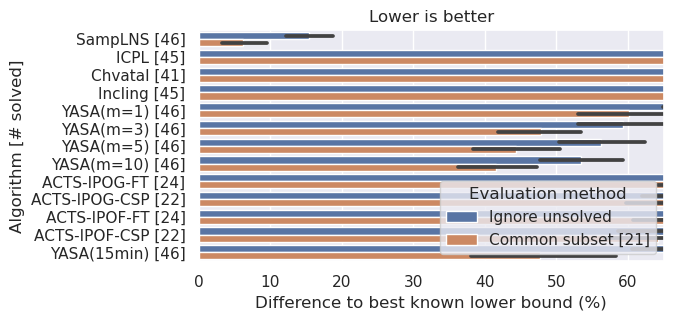

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

t = gaps[gaps["algorithm_name"].isin(algorithm_selection)].copy()

f, ax = plt.subplots(figsize=(6, 3))
t["algorithm_name"] = t["algorithm_name"].apply(
    lambda s: f"{s} [{num_instances_solved_by_alg[s]}]"
)
t["algorithm_name"] = t["algorithm_name"].str.replace("FIDE-", "")
plt.title("Lower is better")
sns.barplot(data=t, y="algorithm_name", x="gap", hue="Instances")
plt.xlabel("Difference to best known lower bound (%)")
plt.ylabel("Algorithm [# solved]")
plt.legend(loc="lower right", title="Evaluation method")
plt.xlim(0, 65)
plt.show()

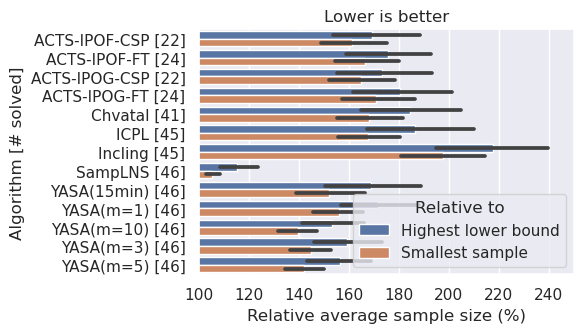

In [104]:
t1 = gaps[["instance_name", "algorithm_name", "gap"]].copy()
t1["Relative to"] = "Best LB"
t2 = (
    gaps[["instance_name", "algorithm_name", "diff_to_best"]]
    .copy()
    .rename(columns={"diff_to_best": "gap"})
)
t2["Relative to"] = "Best UB"
diffs = pd.concat([t1, t2])

f, ax = plt.subplots(figsize=(6, 3.5))
t = diffs.copy()
t["gap"] += 100
t["algorithm_name"] = t["algorithm_name"].apply(
    lambda s: f"{s} [{num_instances_solved_by_alg[s]}]"
)
t["Relative to"].replace(
    {"Best LB": "Highest lower bound", "Best UB": "Smallest sample"}, inplace=True
)
t["algorithm_name"] = t["algorithm_name"].str.replace("FIDE-", "")
t = (
    t.groupby(["algorithm_name", "Relative to", "instance_name"])[["gap"]]
    .mean()
    .reset_index()
)
t.sort_values(by="algorithm_name", inplace=True)
plt.title("Lower is better")
sns.barplot(data=t, y="algorithm_name", x="gap", hue="Relative to")
plt.xlabel("Relative average sample size (%)")
plt.ylabel("Algorithm [# solved]")
plt.legend(loc="lower right", title="Relative to")
plt.xlim(100, 250)
plt.tight_layout()
from _conf import UPPER_LOWER_BOUNDS

plt.savefig(UPPER_LOWER_BOUNDS)
plt.show()

In [105]:
t.groupby(["algorithm_name", "Relative to"])[["gap"]].mean()

gap
algorithm_name     Relative to                    
ACTS-IPOF-CSP [22] Highest lower bound  169.221298
                   Smallest sample      161.221522
ACTS-IPOF-FT [24]  Highest lower bound  175.463176
                   Smallest sample      166.467055
ACTS-IPOG-CSP [22] Highest lower bound  173.251035
                   Smallest sample      164.698805
ACTS-IPOG-FT [24]  Highest lower bound  180.400070
                   Smallest sample      170.879931
Chvatal [41]       Highest lower bound  184.536821
                   Smallest sample      168.186296
ICPL [45]          Highest lower bound  186.257111
                   Smallest sample      167.772433
Incling [45]       Highest lower bound  217.699206
                   Smallest sample      197.535016
SampLNS [46]       Highest lower bound  115.423549
                   Smallest sample      105.456699
YASA(15min) [46]   Highest lower bound  168.962824
                   Smallest sample      152.221175
YASA(m=1) [46]     Highest lower bound  171.849638
                   Smallest sample      156.213006
YASA(m=10) [46]    Highest lower bound  153.386292
                   Smallest sample      139.644291
YASA(m=3) [46]     Highest lower bound  159.261259
                   Smallest sample      144.934880
YASA(m=5) [46]     Highest lower bound  156.269186
                   Smallest sample      142.266985

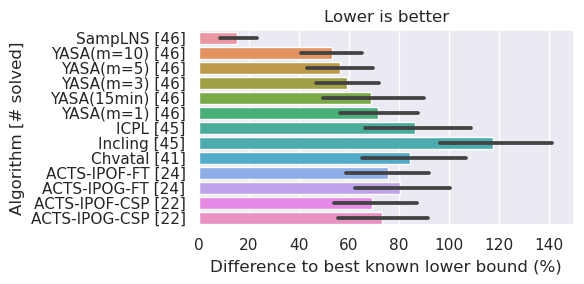

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

t = gaps[gaps["algorithm_name"].isin(algorithm_selection)].copy()
t = t[t["Instances"] == "Ignore unsolved"]
t = t.groupby(["algorithm_name", "instance_name"])[["gap"]].mean().reset_index()
t_ = (
    t.groupby("algorithm_name")[["gap"]]
    .mean()
    .reset_index()
    .rename(columns={"gap": "gap_mean_of_alg"})
)
t = t.merge(t_, on="algorithm_name")
f, ax = plt.subplots(figsize=(6, 3))
t["num_instance_solved_by_alg"] = t["algorithm_name"].apply(
    lambda s: num_instances_solved_by_alg[s]
)
t["algorithm_name"] = t["algorithm_name"].apply(
    lambda s: f"{s} [{num_instances_solved_by_alg[s]}]"
)

t["algorithm_name"] = t["algorithm_name"].str.replace("FIDE-", "")


def order_algs(alg_name):
    if alg_name.startswith("SampLNS"):
        return (0, len(alg_name), alg_name)
    if alg_name.startswith("YASA"):
        return (1, len(alg_name), alg_name)
    if alg_name.startswith("ACTS"):
        return (3, len(alg_name), alg_name)
    return (2, len(alg_name), alg_name)


t["sort"] = t["algorithm_name"].apply(order_algs)
# t.sort_values(by="sort", inplace=True)
t.sort_values(
    by=["num_instance_solved_by_alg", "gap_mean_of_alg"],
    inplace=True,
    ascending=(False, True),
)

plt.title("Lower is better")
sns.barplot(data=t, y="algorithm_name", x="gap", errorbar="ci")
plt.xlabel("Difference to best known lower bound (%)")
plt.ylabel("Algorithm [# solved]")
# plt.legend(loc="lower right", title="Evaluation method")
plt.xlim(0, 150)
plt.tight_layout()
plt.savefig("./OUTPUT/07_lower_bound_gap.pdf")
plt.show()

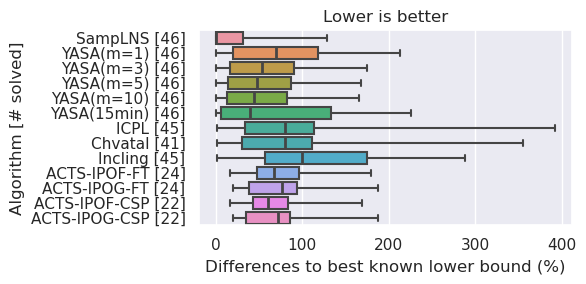

In [113]:
t = gaps[gaps["algorithm_name"].isin(algorithm_selection)].copy()
t = t[t["Instances"] == "Ignore unsolved"]
t = t.groupby(["algorithm_name", "instance_name"])[["gap"]].mean().reset_index()
f, ax = plt.subplots(figsize=(6, 3))
t["num_instance_solved_by_alg"] = t["algorithm_name"].apply(
    lambda s: num_instances_solved_by_alg[s]
)
t["algorithm_name"] = t["algorithm_name"].apply(
    lambda s: f"{s} [{num_instances_solved_by_alg[s]}]"
)
t["algorithm_name"] = t["algorithm_name"].str.replace("FIDE-", "")
t_ = (
    t.groupby("algorithm_name")[["gap"]]
    .mean()
    .reset_index()
    .rename(columns={"gap": "gap_mean_of_alg"})
)
t = t.merge(t_, on="algorithm_name")


def order_algs(alg_name):
    if alg_name.startswith("SampLNS"):
        return (0, len(alg_name), alg_name)
    if alg_name.startswith("YASA"):
        return (1, len(alg_name), alg_name)
    if alg_name.startswith("ACTS"):
        return (3, len(alg_name), alg_name)
    return (2, len(alg_name), alg_name)


t["sort"] = t["algorithm_name"].apply(order_algs)
t.sort_values(by="sort", inplace=True)
# t.sort_values(
#    by=["num_instance_solved_by_alg", "gap_mean_of_alg"],
#    inplace=True,
#    ascending=(False, True),
# )

plt.title("Lower is better")
sns.boxplot(
    data=t, y="algorithm_name", x="gap", medianprops={"linewidth": 2.0}, whis=(0, 100)
)
plt.xlabel("Differences to best known lower bound (%)")
plt.ylabel("Algorithm [# solved]")
# plt.legend(loc="lower right", title="Evaluation method")
# plt.xlim(0, 140)
plt.tight_layout()
plt.savefig("./OUTPUT/07_lower_bound_gap_boxplot.pdf")
plt.show()

In [108]:
t.groupby(["algorithm_name"])[["gap"]].quantile(0.25)

,gap
algorithm_name,
ACTS-IPOF-CSP [22],43.125000
ACTS-IPOF-FT [24],47.708333
ACTS-IPOG-CSP [22],35.505952
ACTS-IPOG-FT [24],37.946429
Chvatal [41],30.000000
ICPL [45],33.333333
Incling [45],56.493151
SampLNS [46],0.000000
YASA(15min) [46],5.917339


In [109]:
t.groupby(["algorithm_name"])[["gap"]].mean()

,gap
algorithm_name,
ACTS-IPOF-CSP [22],69.221298
ACTS-IPOF-FT [24],75.463176
ACTS-IPOG-CSP [22],73.251035
ACTS-IPOG-FT [24],80.400070
Chvatal [41],84.536821
ICPL [45],86.257111
Incling [45],117.699206
SampLNS [46],15.423549
YASA(15min) [46],68.962824


In [110]:
t.groupby(["algorithm_name"])[["gap"]].median().round()

,gap
algorithm_name,
ACTS-IPOF-CSP [22],61.0
ACTS-IPOF-FT [24],67.0
ACTS-IPOG-CSP [22],72.0
ACTS-IPOG-FT [24],76.0
Chvatal [41],80.0
ICPL [45],80.0
Incling [45],100.0
SampLNS [46],0.0
YASA(15min) [46],40.0


In [111]:
# How many instances have been solved to optimality by the baseline algorithms? (Note that this is a lower bound)
t = gaps.groupby(["algorithm_name", "instance_name"])[["gap"]].min() == 0
t = (
    t.reset_index()
    .groupby("algorithm_name")[["gap"]]
    .sum()
    .rename(columns={"gap": "num_opt"})
)
t["num_opt_rel"] = t["num_opt"] / len(gaps["instance_name"].unique())
t

,num_opt,num_opt_rel
algorithm_name,,
ACTS-IPOF-CSP,1,0.021739
ACTS-IPOF-FT,1,0.021739
ACTS-IPOG-CSP,0,0.000000
ACTS-IPOG-FT,0,0.000000
FIDE-Chvatal,1,0.021739
FIDE-ICPL,1,0.021739
FIDE-YASA(15min),6,0.130435
FIDE-YASA(m=1),3,0.065217
FIDE-YASA(m=10),6,0.130435


In [112]:
# How many instances have a gap of less than 10%?
t = gaps.groupby(["algorithm_name", "instance_name"])[["gap"]].min() <= 10
t = (
    t.reset_index()
    .groupby("algorithm_name")[["gap"]]
    .sum()
    .rename(columns={"gap": "num_10"})
)
t["num_10_rel"] = t["num_10"] / len(gaps["instance_name"].unique())
t

,num_10,num_10_rel
algorithm_name,,
ACTS-IPOF-CSP,1,0.021739
ACTS-IPOF-FT,1,0.021739
ACTS-IPOG-CSP,0,0.000000
ACTS-IPOG-FT,0,0.000000
FIDE-Chvatal,5,0.108696
FIDE-ICPL,6,0.130435
FIDE-YASA(15min),14,0.304348
FIDE-YASA(m=1),10,0.217391
FIDE-YASA(m=10),13,0.282609
